# Image Compression with SVD

There are cases where compression of files or images are necessary during transmission between devices. For example, when we browse images on internet with our cellphones, images might be resized to better fit on the screens or compressed to increase efficiency of transmission.
We know an image is composed of pixels and the color of each pixel is composed of three primary colors: Red, Green and Blue. Then any image could be represented as three metrics R,G and B whose entries are the color levels at the corresponding positions.
To better explain the idea, we use the black and white image for our example whose representing matrix is the one with the grey levels at each pixel as entries.

If we have the matrix $M$ whose entries are the gray values at the corresponding position of an image. We claim that $M'$ is the $k$-rank approximation of $M$, and $M'=U'Σ'V'^T$ where,
- $U'$ is the $k$-rank approximation of $U$, which only has the first $k$ columns in $U$.
- $Σ'$ only has the first $k$ singular values of $Σ$.
- $V'^T$ only has the first rows of $V^T$.

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16, 8]

## 1. Read the image

We first must read the image and convert it to a gray scale image. Next, we have to create the $X$ matrix.

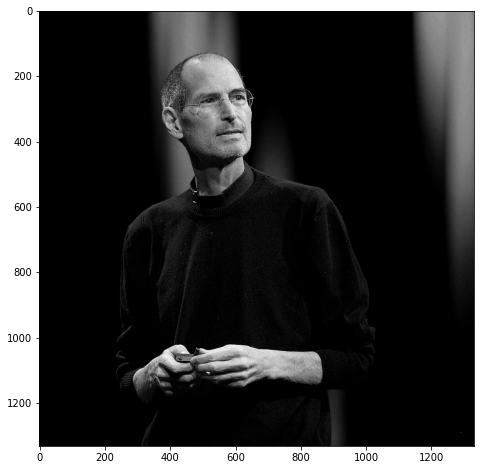

In [2]:
A = imread('steve_jobs.jpg')
X = np.mean(A, -1) # convert RGB to grayscale

img = plt.imshow(X, cmap='gray')
plt.show()

## SVD decomposition of the input image

We can use `numpy.linalg.svd()` function from NumPy library to extract the SVD decompostion of the desire input image readily. Note that `full_matrices = False` indicates that we want the economy(reduced) SVD.

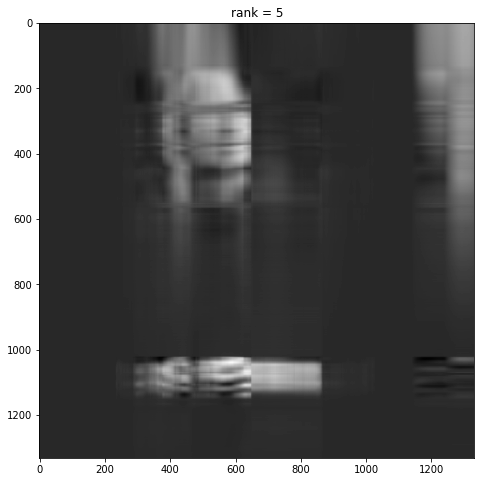

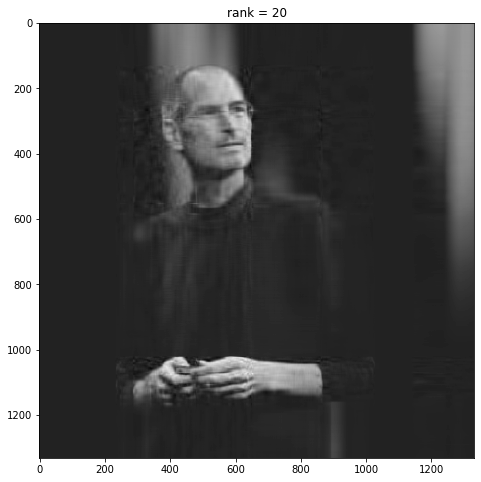

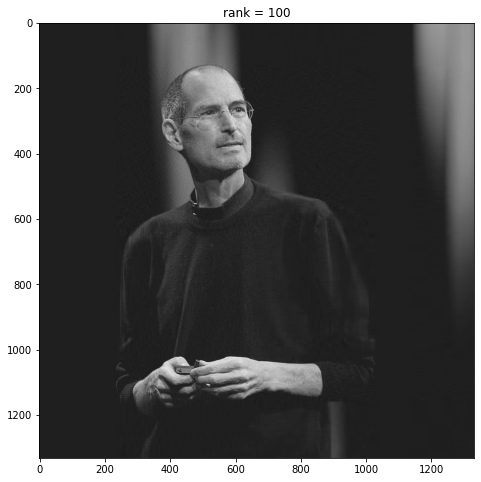

In [3]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S= np.diag(S)

j = 0
for r in [5, 20, 100]:
    #construct the approximate image
    Xapprox = U[:, :r] @ S[:r, :r] @ VT[:r, :]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox, cmap='gray')
    plt.title('rank = ' + str(r))
    plt.show()

## 3. Singular values

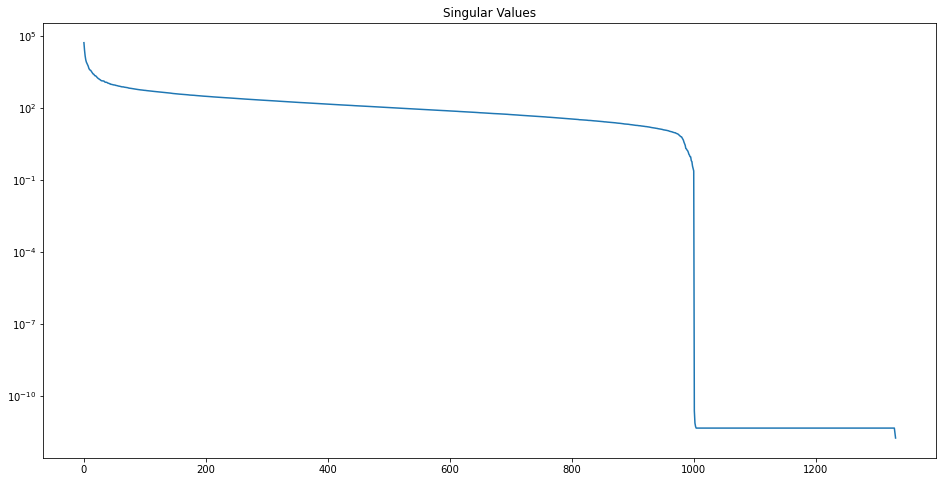

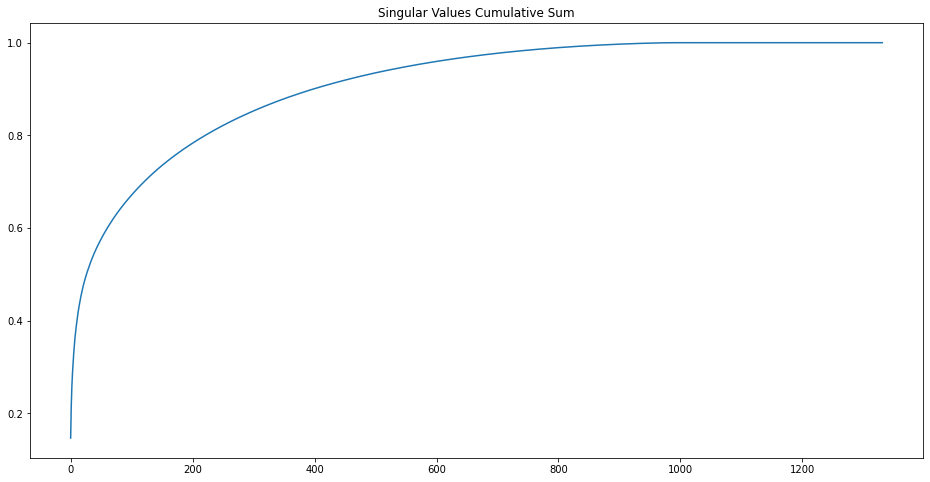

In [4]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S)/np.sum(np.sum(np.diag(S)))))
plt.title('Singular Values Cumulative Sum')
plt.show()